In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import mlflow
import mlflow.sklearn

In [3]:
# import logging
# logging.basicConfig(level=logging.WARN)
# logger = logging.getLogger(__name__)

In [4]:
data = pd.read_csv('D:\Fuse taining\ISEAR.csv',names=  ['index','emotions','message'])

<input>:1: DeprecationWarning: invalid escape sequence \F
<input>:1: DeprecationWarning: invalid escape sequence \F
<input>:1: DeprecationWarning: invalid escape sequence \F
<ipython-input-4-0861a486e233>:1: DeprecationWarning: invalid escape sequence \F
  data = pd.read_csv('D:\Fuse taining\ISEAR.csv',names=  ['index','emotions','message'])


In [5]:
data.head()

,index,emotions,message
0,0,joy,On days when I feel close to my partner and ot...
1,1,fear,Every time I imagine that someone I love or I ...
2,2,anger,When I had been obviously unjustly treated and...
3,3,sadness,When I think about the short time that we live...
4,4,disgust,At a gathering I found myself involuntarily si...


In [6]:
df = data.drop(columns =['index'])

In [7]:
df.head(2)

,emotions,message
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...


Before moving forward let's see shape of dataframe

In [8]:
df.shape

(7446, 2)

In [9]:
df.emotions.value_counts()

joy        1082
sadness    1074
anger      1069
fear       1063
disgust    1059
shame      1059
guilt      1040
Name: emotions, dtype: int64

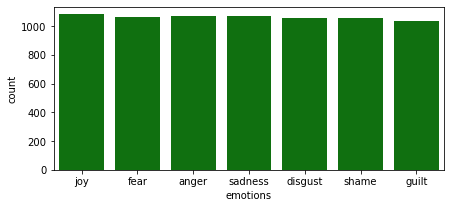

In [10]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(x="emotions", data=df, color="g");

##### It's a perfectly balanced dataset.

In [11]:
df.message.values[0]

'On days when I feel close to my partner and other friends.   \nWhen I feel at peace with myself and also experience a close  \ncontact with people whom I regard greatly.'

As you can see there are `\n` and extra spaces in `message` data. So you need to clean it. Use regular expression to do so.First lets see what kind of unnecessary symbols we have in this dataset.

In [12]:
# regx use garera falne symbols, stopwords , countvetoriser, fit , sgd classifirr,
# f1, confusion, accuracy, precison and recall( calssification report)

In [13]:
import re
def clean_tweet(tweet): 
    ''' 
    Utility function to clean tweet text by removing links, special characters 
    using simple regex statements. 
    '''
    return ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

In [14]:
clean_tweet(df.message.values[0])

'On days when I feel close to my partner and other friends When I feel at peace with myself and also experience a close contact with people whom I regard greatly.'

In [15]:
df1 = df.copy()

In [16]:
df1['message'] = df1['message'].apply(lambda x: clean_tweet(x))

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df1.message
y = df1.emotions

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from urllib.parse import urlparse
from sklearn.metrics import average_precision_score
import os
mlflow.set_tracking_uri("file://d:/Fuse taining/Emotion-Detection/log/tfidf_multinominal")

In [25]:
with mlflow.start_run():

    mlflow.sklearn.log_model(TfidfVectorizer(), "TfidfVectorizer")
    mlflow.sklearn.log_model(MultinomialNB(), "MultinomialNB")
    pipe = make_pipeline(TfidfVectorizer(), MultinomialNB())
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy)
#     precision_recall_f1score = precision_recall_fscore_support(y_test, y_pred, average='micro')
    mlflow.log_metric("Accuracy", accuracy)

    precision_metric = precision_score(y_test, y_pred, average = "macro")
    print(precision_metric)
    mlflow.log_metric("precision_score", precision_metric)
    
    recall_metric = recall_score(y_test, y_pred, average = "macro")
    print(recall_metric)
    mlflow.log_metric("recall_score", recall_metric)
    

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
    mlflow.end_run()



Exception: Run with UUID 188d9961b847469999f5fa0552d0e6f3 is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True

In [ ]:
import os

In [26]:
os.path.dirname(os.path.abspath('D:'))

'D:\\'

In [ ]:
# mlflow.log_metric("score", score)
# mlflow.sklearn.log_model(lr, "model")
# print("Model saved in run %s" % mlflow.active_run().info.run_uuid)
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(y_actual, y_pred):
    data = confusion_matrix(y_actual, y_pred)
    df_cm = pd.DataFrame(data, columns = np.unique(y_actual), index = np.unique(y_actual))
    df_cm.index.name ='Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (14, 8))
    ax = plt.axes()
    sns.set(font_scale =2)
    sns.heatmap(df_cm, cmap = "Blues", ax =ax, annot =True, fmt = "d")
    ax.set_title('Confusion Matrix of TfidfVectorizer + MultinomialNB')
    plt.show()

In [ ]:
plot_confusion_matrix(y_test,y_pred)

In [ ]:
pipe.predict(["The same person who said the sweetest things to me also said some\
               of the meanest things I've ever heard."])

In [ ]:
pipe.predict(['Its nice when someone cares about you as much as you care about them.'])

In [ ]:
pipe.predict(['I have learned that sometimes “sorry” is not enough.\
               Sometimes you actually have to change.'])

In [ ]:
pipe.predict(['Some people never realise the emotional and mental\
               damage they do to others.']) # angry

In [ ]:
# precision_recall_f1score = precision_recall_fscore_support(y_test, y_pred, average='micro')
# # metric = {'accuray': accuracy, 'precision_recall_f1_score': precision_recall_f1score}

In [ ]:
# metric

In [ ]:
# !pip install imblearn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:

# mlflow.sklearn.log_model(TfidfVectorizer(), "TfidfVectorizer")
# mlflow.sklearn.log_model(MultinomialNB(), "MultinomialNB")

# mlflow.log_metric("Accuracy", accuracy)

# precision_metric = precision_score(y_test, y_pred, average = "macro")
# print(precision_metric)
# mlflow.log_metric("precision_score", precision_metric)

# recall_metric = recall_score(y_test, y_pred, average = "macro")
# print(recall_metric)
# mlflow.log_metric("recall_score", recall_metric)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
mlflow.set_tracking_uri(base_dir + "log\CountVectorizer_tfidftrans_multinoninal")
mlflow.sklearn.log_model(CountVectorizer(), "CountVectorizer")
mlflow.sklearn.log_model(TfidfTransformer(), "TfidfTransformer")
mlflow.sklearn.log_model(MultinomialNB(), "MultinomialNB")

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

##########logs

mlflow.log_metric("Accuracy", accuracy)

precision_metric = precision_score(y_test, y_pred, average = "macro")
print(precision_metric)
mlflow.log_metric("precision_score", precision_metric)

recall_metric = recall_score(y_test, y_pred, average = "macro")
print(recall_metric)
mlflow.log_metric("recall_score", recall_metric)

In [ ]:
def plot_confusion_matrix(y_actual, y_pred):
    data = confusion_matrix(y_actual, y_pred)
    df_cm = pd.DataFrame(data, columns = np.unique(y_actual), index = np.unique(y_actual))
    df_cm.index.name ='Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (14, 8))
    ax = plt.axes()
    sns.set(font_scale =2)
    sns.heatmap(df_cm, cmap = "Blues", ax =ax, annot =True, fmt = "d")
    ax.set_title('Confusion Matrix of CountVectorizer + TfidfVectorizer + MultinomialNB')
    plt.show()

In [ ]:
plot_confusion_matrix(y_test,y_pred)

In [ ]:
nb.predict(["The same person who said the sweetest things to me also said some\
             of the meanest things I've ever heard."])

In [ ]:
nb.predict(['Its nice when someone cares about you as much as you care about them.'])

In [ ]:
nb.predict(['I have learned that sometimes “sorry” is not enough.\
             Sometimes you actually have to change.'])

In [ ]:
nb.predict(['Some people never realise the emotional and mental\
            damage they do to others.']) # angry

In [ ]:
from sklearn.linear_model import SGDClassifier

# mlflow.set_tracking_uri('D:\Fuse taining\Emotion-Detection\log\sgd_classifier')
mlflow.set_tracking_uri(base_dir + "log\sgd_classifier")
mlflow.sklearn.log_model(CountVectorizer(), "CountVectorizer")
mlflow.sklearn.log_model(TfidfTransformer(), "TfidfTransformer")
mlflow.sklearn.log_model(SGDClassifier(), "SGDClassifier")
mlflow.log_param("Los", "hinge")
mlflow.log_param("Penalty", "l2")
mlflow.log_param("alpha", 1e-3)
mlflow.log_param("random_state", 42)



sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred))


###################################################################
mlflow.log_metric("Accuracy", accuracy)

precision_metric = precision_score(y_test, y_pred, average = "macro")
print(precision_metric)
mlflow.log_metric("precision_score", precision_metric)

recall_metric = recall_score(y_test, y_pred, average = "macro")
print(recall_metric)
mlflow.log_metric("recall_score", recall_metric)

In [ ]:
def plot_confusion_matrix(y_actual, y_pred):
    data = confusion_matrix(y_actual, y_pred)
    df_cm = pd.DataFrame(data, columns = np.unique(y_actual), index = np.unique(y_actual))
    df_cm.index.name ='Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (14, 8))
    ax = plt.axes()
    sns.set(font_scale =2)
    sns.heatmap(df_cm, cmap = "Blues", ax =ax, annot =True, fmt = "d")
    ax.set_title('Confusion Matrix of CountVectorizer + TfidfVectorizer + SGDClassifier')
    plt.show()

In [ ]:
plot_confusion_matrix(y_test,y_pred)

In [ ]:
sgd.predict(["The same person who said the sweetest things to me also said some\
              of the meanest things I've ever heard."])

In [ ]:
sgd.predict(['Its nice when someone cares about you as much as you care about them.'])

In [ ]:
sgd.predict(['I have learned that sometimes “sorry” is not enough. \
              Sometimes you actually have to change.'])

In [ ]:
sgd.predict(['Some people never realise the emotional and mental\
              damage they do to others.']) # angry

In [ ]:
# from sklearn.linear_model import SGDClassifier

# sgd = Pipeline([('vect', CountVectorizer()),
#                 ('tfidf', TfidfTransformer()),
#                 ('clf', SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
#                ])
# sgd.fit(X_train, y_train)


# y_pred = sgd.predict(X_test)

# print('accuracy %s' % accuracy_score(y_pred, y_test))
# print(classification_report(y_test, y_pred))

# Another method

In [ ]:
from nltk.corpus import stopwords
import nltk

In [ ]:
REPLACE_BY_SPACE_RE = re.compile(r'[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile(r'[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))


def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    


In [ ]:
df['message'] = df['message'].apply(lambda x: clean_text(x))

In [ ]:
df['message'][0]

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='modified_huber', penalty='l2',alpha=1e-3, random_state=2020, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix 

In [ ]:
results = confusion_matrix(y_test, y_pred) 

In [ ]:
results